In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Comma Data Updated Headers.csv')

In [7]:
df.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna(subset = ['Gender', 'Age'])
series = df.groupby(["Gender", "Age"]).transform(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
type(series)

pandas.core.frame.DataFrame

In [10]:
df2 = df.dropna()
df3 = pd.get_dummies(series, drop_first= True)

In [11]:
#rename column names
df3 = df3.rename(index = str, columns ={"Sentence_It's important for a person to be honest, kind, and loyal.": "Oxford Comma Use", 
                                        "OxfordCommaHeard_Yes":"Heard of Oxford Comma",
                                        "OxfordCommaCare_Not at all" : "Oxford Care - Not at all", 
                                        "OxfordCommaCare_Not much" : "Oxford Care - Not much",
                                        "OxfordCommaCare_Some" : "Oxford Care - Some",
                                        "Unnamed: 4_Some experts say it's important to drink milk, but the data is inconclusive." : "Data Use",
                                        "DataPlural_Yes": "Data is Plural",
                                        "DataPluralCare_Not at all": "Data Plural Care - Not at all",
                                        "DataPluralCare_Not much" : "Data Plural Care - Not much",
                                        "DataPluralCare_Some" : "Data Plural Care - Some",
                                        "GrammarImportance_Somewhat important": "Grammar - Somewhat Important",
                                        "GrammarImportance_Somewhat unimportant": "Grammar - Somewhat Unimportant",
                                        "GrammarImportance_Very important": "Grammar - Very Important",
                                        "GrammarImportance_Very unimportant": "Grammar - Very Unimportant",
                                        "Education_Graduate degree": "Graduate Degree",
                                        "Education_High school degree" : "High School Degree", 
                                        "Education_Less than high school degree" : "Less than HS Degree",
                                        "Education_Some college or Associate degree": "Some college/Associate Degree"})
df3.head(1)

,RespondentID,Oxford Comma Use,Heard of Oxford Comma,Oxford Care - Not at all,Oxford Care - Not much,Oxford Care - Some,Data Use,Data is Plural,Data Plural Care - Not at all,Data Plural Care - Not much,...,Less than HS Degree,Some college/Associate Degree,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,3292953864,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df3.to_csv('clean_data.csv')
y = df3["Oxford Comma Use"]
x = df3.drop(["Oxford Comma Use", "RespondentID"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42, stratify=y)

In [20]:
comma = df2.replace("It's important for a person to be honest, kind, and loyal.", 'Used').replace("It's important for a person to be honest, kind and loyal.", 'Not Used')
comma.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,Not Used,Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,Used,No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
5,3292926586,Used,No,A lot,"Some experts say it's important to drink milk,...",Yes,Some,Very important,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,New England
6,3292908135,Used,Yes,A lot,"Some experts say it's important to drink milk,...",Yes,Some,Very important,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
7,3292869879,Used,Yes,A lot,"Some experts say it's important to drink milk,...",No,A lot,Very important,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,East North Central


In [60]:
#explore data
comma.describe(include=['O'])

,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
count,825,825,825,825,825,825,825,825,825,825,825,825
unique,2,2,4,2,2,4,5,2,4,5,5,9
top,Used,Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not much,Very important,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,470,497,311,661,419,321,531,436,248,286,279,151


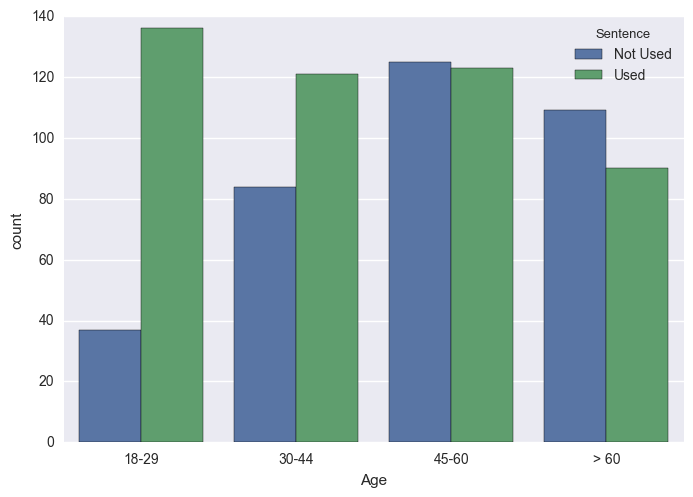

In [21]:
sns.countplot(x="Age", data=comma, hue = 'Sentence', order = ['18-29', '30-44', '45-60', '> 60']);

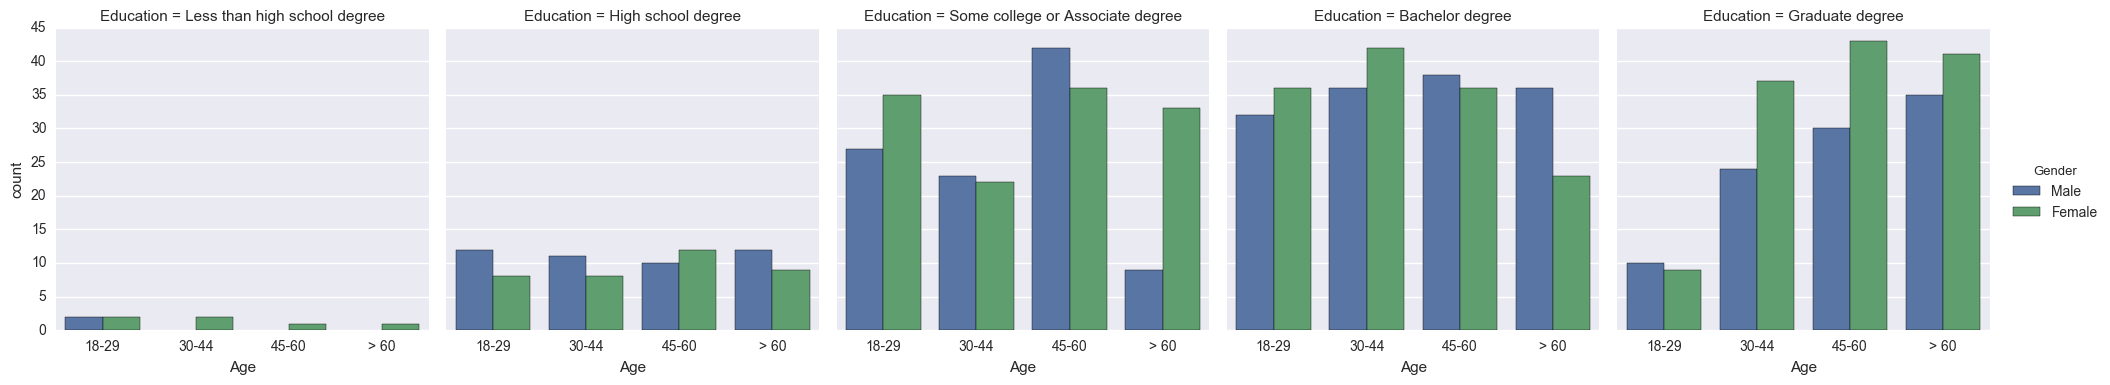

In [23]:
sns.factorplot(x="Age", col="Education", hue = 'Gender', data=comma,
               kind="count", size=4, aspect=1, ci=None, col_wrap = 5, legend_out =True,
               #col_order = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'],
               col_order = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree', 'Graduate degree'],
               order = ['18-29', '30-44', '45-60', '> 60'],
               #hue_order = ['Very unimportant', 'Somewhat unimportant', 'Neither important nor unimportant (neutral)', 'Somewhat important', 'Very important']
              )

In [33]:
def comparison_graph_comma(x, y, hue, wrap):
    Age_order = ['18-29', '30-44', '45-60', '> 60']
    Income_order = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
    Education_order = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree', 'Graduate degree']
    Grammar_order = ['Very unimportant', 'Somewhat unimportant', 'Neither important nor unimportant (neutral)', 'Somewhat important', 'Very important']
    Gender_order = ['Male', 'Female']
    Sentence_order = ['Used', 'Not Used']
    Location_order = ['East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
    Heard_order = ['Yes', 'No']
    Care_order = ['Not at all', 'Not much', 'Some', 'A lot']
    
    if x == 'Age':
        x_order = Age_order
    if x == 'Income':
        x_order = Income_order
    if x == 'Education':
        x_order = Education_order
    if x == 'GrammarImportance':
        x_order = Grammar_order
    if x == 'Gender':
        x_order = Gender_order
    if x == 'Sentence':
        x_order = Sentence_order
    if x == 'Location':
        x_order = Location_order
    if x == 'OxfordCommaHeard':
        x_order = Heard_order
    if x =='OxfordCommaCare':
        x_order = Care_order
        
    if y == 'Age':
        y_order = Age_order
    if y == 'Income':
        y_order = Income_order
    if y == 'Education':
        y_order = Education_order
    if y == 'GrammarImportance':
        y_order = Grammar_order
    if y == 'Gender':
        y_order = Gender_order
    if y == 'Sentence':
        y_order = Sentence_order
    if y == 'Location':
        y_order = Location_order
    if y == 'OxfordCommaHeard':
        y_order = Heard_order
    if y =='OxfordCommaCare':
        y_order = Care_order
        
    if hue == 'Age':
        hue_ordered = Age_order
    if hue == 'Income':
        hue_ordered = Income_order
    if hue == 'Education':
        hue_ordered = Education_order
    if hue == 'GrammarImportance':
        hue_ordered = Grammar_order
    if hue == 'Gender':
        hue_ordered = Gender_order
    if hue == 'Sentence':
        hue_ordered = Sentence_order
    if hue == 'Location':
        hue_ordered = Location_order
    if hue == 'OxfordCommaHeard':
        hue_ordered = Heard_order
    if hue =='OxfordCommaCare':
        hue_ordered = Care_order
    
    sns.factorplot(x=x, col=y, hue = hue, data=comma,
               kind="count", size=4, aspect=1, ci=None, col_wrap = wrap, legend_out =True,
               col_order = y_order, order = x_order, hue_order = hue_ordered)



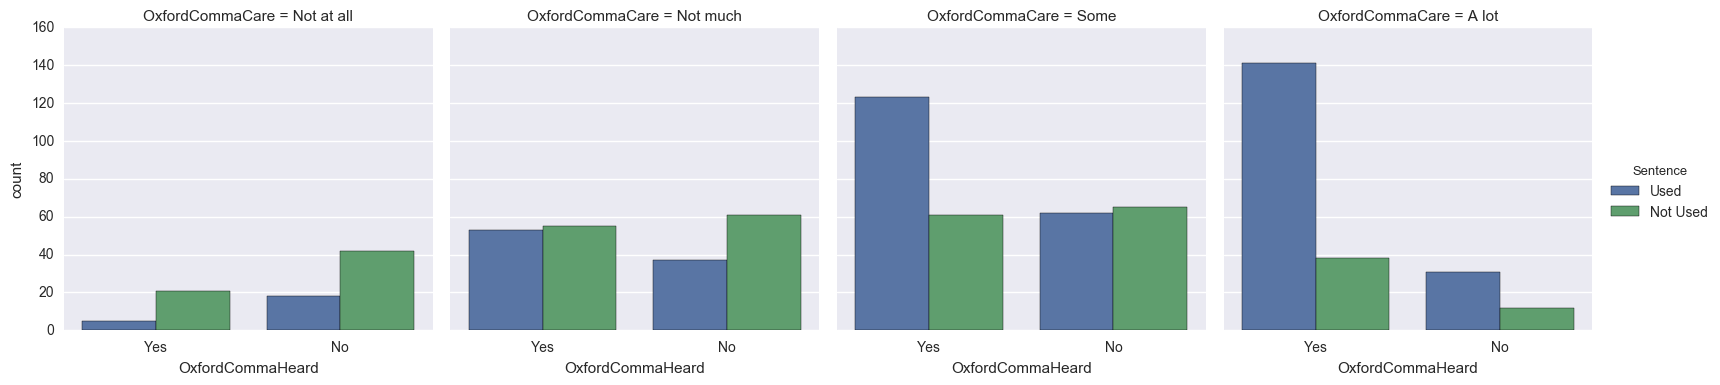

In [32]:
comparison_graph_comma('OxfordCommaHeard', 'OxfordCommaCare', 'Sentence', 4)